# Лабораторная работа №3. Апериодические сигналы

In [3]:
import numpy as np
import sys
sys.path.append('../')
from thinkdsp import decorate
from thinkdsp import Chirp
from thinkdsp import normalize, unbias
from thinkdsp import read_wave

## Упраженение 3.2

Напишем класс SawtoothChirp, расширяющий Chirp для генерации пилообразного сигнала с линейно увеличивающейся или уменьшающейся частотой:

In [37]:
class SawtoothChirp(Chirp):
    """Represents a sawtooth-like signal with varying frequency."""
    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times

        returns: float wave array
        """
        freqs = np.linspace(self.start, self.end, len(ts))
        dts = np.diff(ts, prepend=0)
        dphis = 2 * (np.pi * freqs * dts)
        phases = np.cumsum(dphis)
        cycles = phases / (2 * np.pi)
        frac, _ = np.modf(cycles)
        ys =  normalize(unbias(frac), self.amp)
        return ys

Получим спектрограмму этого сигнала и послушаем запись:

In [38]:
signal = SawtoothChirp(start=100, end=1000)
wave = signal.make_wave(duration=3, framerate=10000)
wave.apodize()
wave.make_audio()

Распечатаем спектрограмму:

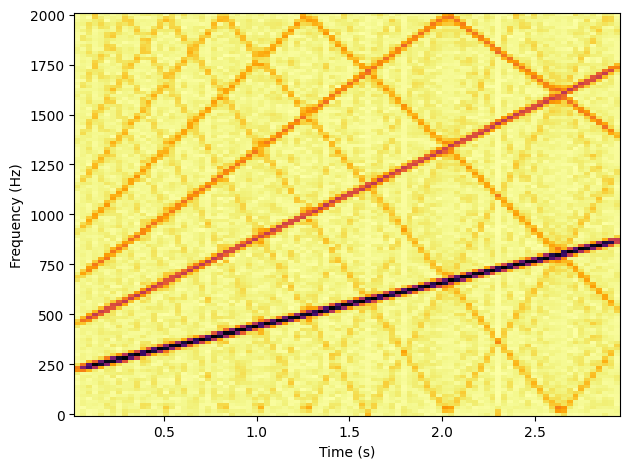

In [39]:
sp = wave.make_spectrogram(256)
sp.plot()
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

При прослушавании отчетливо слышны биения

## Упражнение 3.3
Создадим пилообразный чирп, меняющийся от 2500 до 3000 Гц. На его основе сгенерируем сигнал длительностью 1 с и с частотой кадров 20 кГц:

In [40]:
signal = SawtoothChirp(start=2500, end=3000)
wave = signal.make_wave(duration=1, framerate=20000)
wave.make_audio()

Распечатаем спектр этого сигнала:

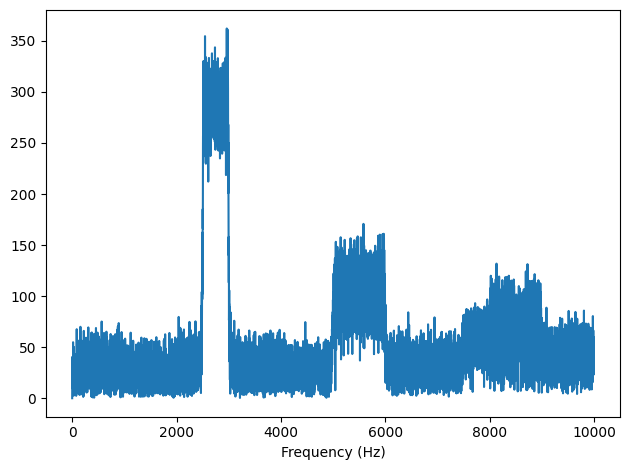

In [41]:
wave.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

## Упражнение 3.4
Для упражнения было взято произведение "Rhapsody in Blue" Джорджа Гершвина. Прослушаем его и распечатаем спектограмму

In [42]:
wave = read_wave('rhapblue.wav')
wave = wave.segment(start = 1, duration= 5)
wave.make_audio()

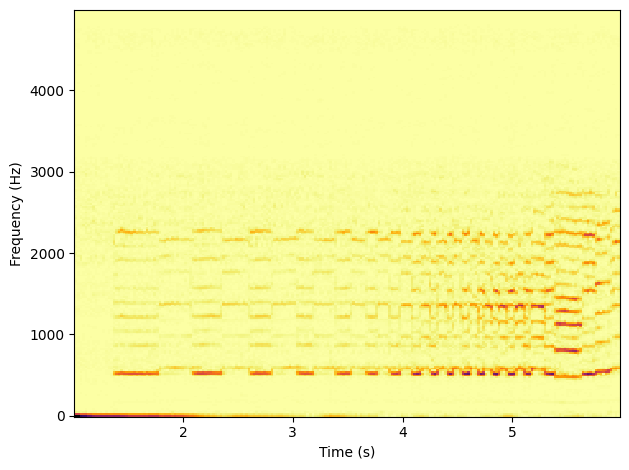

In [43]:
wave.make_spectrogram(512).plot(high=5000)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

## Упражнение 3.5

Напишем класс TromboneGliss, расширяющий Chirp и предоставляющий evaluate и создадим сигнал, имитирующий глиссадо на тромбоне

In [44]:
class TromboneGliss(Chirp):
    """Represents a trombone-like signal with varying frequency."""

    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times

        returns: float wave array
        """
        l1, l2 = 1.0 / self.start, 1.0 / self.end
        lengths = np.linspace(l1, l2, len(ts))
        freqs = 1 / lengths

        dts = np.diff(ts, prepend=0)
        dphis = (2 * np.pi) * freqs * dts
        phases = np.cumsum(dphis)
        ys = self.amp * np.cos(phases)
        return ys

In [49]:
signal = TromboneGliss(262, 349)
wave1 = signal.make_wave(duration=1)
wave1.apodize()
wave1.make_audio()

signal = TromboneGliss(349, 262)
wave2 = signal.make_wave(duration=1)
wave2.apodize()
wave2.make_audio()

wave = wave1 | wave2
wave.make_audio()

Распечатаем спектрограмму:

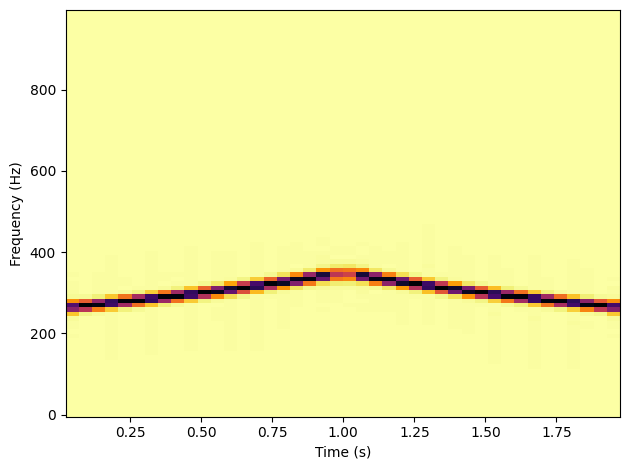

In [50]:
sp = wave.make_spectrogram(1024)
sp.plot(high=1000)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

На изображении спектограммы видно, как линия частоты сигнала искривлена вверх, что означает, что это экспоненциальный чирп


## Упражнение 3.6
Послушаем запись серии гласных звуков и посмотрим их спектрограмму:

In [39]:
wave = read_wave('vowels.wav').segment(start=0, duration=5)
wave.make_audio()

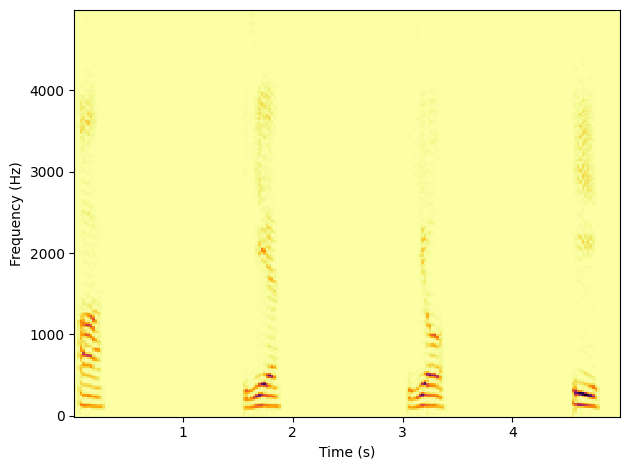

In [45]:
wave.make_spectrogram(1024).plot(high=5000)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

Судя по спектрограмме, буквы "а" и "и" обладают постаянной частотой при произношении, в то время как при произношении звуков "е" и "ё" высота голоса возрастает. Можно так же заметить, что звук "и" более низкий, чем звук "а". Звуки "е" и "ё" на спектограмме выглядят похоже и различить их очень трудно